**Model When Epoch set to 40** (Base Model had the same configuration with Epochs = 20)

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

In [0]:
batch_size = 128
num_classes = 10
epochs = 40

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 57s 0us/step


In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 21s 424us/step - loss: 2.2283 - acc: 0.2488 - val_loss: 1.8064 - val_acc: 0.3575
Epoch 2/40
50000/50000 [==============================] - 21s 416us/step - loss: 1.8555 - acc: 0.3310 - val_loss: 1.7111 - val_acc: 0.3938
Epoch 3/40
50000/50000 [==============================] - 21s 415us/step - loss: 1.7774 - acc: 0.3595 - val_loss: 1.6988 - val_acc: 0.4100
Epoch 4/40
50000/50000 [==============================] - 21s 412us/step - loss: 1.7283 - acc: 0.3820 - val_loss: 1.6392 - val_acc: 0.4193
Epoch 5/40
50000/50000 [==============================] - 21s 413us/step - loss: 1.6857 - acc: 0.3947 - val_loss: 1.6286 - val_acc: 0.4282
Epoch 6/40
50000/50000 [==============================] - 21s 412us/step - loss: 1.6633 - acc: 0.4043 - val_loss: 1.5944 - val_acc: 0.4417
Epoch 7/40
50000/50000 [==============================] - 21s 417us/step - loss: 1.6394 - acc: 0.4144 - val_loss: 1.

When Epoch = 20, batch size = 128, drop out = 0.2, Two dense hidden layer with 512 neurons, relu activation function and softmax output function 
Test accuracy : 0.458 and loss = 1.538

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


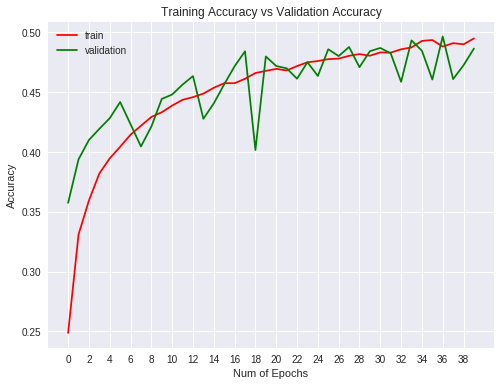

In [0]:

plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 40, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

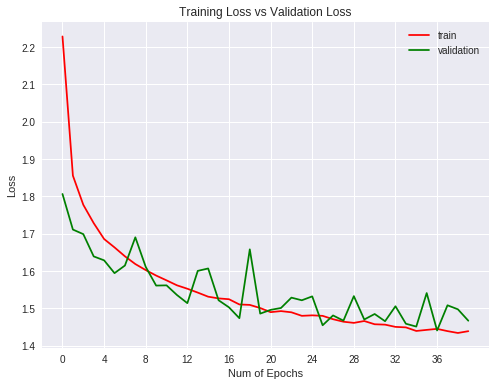

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 40, 4.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
From the graphs we incur that there is not much increase in validation accuracy, but there is gradual loss decrease. So will increase the Epoch little more to 50.